In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ellipse import LsqEllipse
from vestibular_vr_pipeline.sleap import load_and_process as lp
from scipy.ndimage import median_filter

In [9]:
path = '/home/ikharitonov/RANCZLAB-NAS/data/ONIX/20240730_Mismatch_Experiment/training_day4/2024-08-02T12-25-55_B3M3/VideoData2/'
file = 'VideoData2_1904-01-03T23-00-00.sleap.csv'
df = lp.load_df(path+file)
df = df.drop(columns=['track'])
df

,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,right.y,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
0,0,NaN,163.904974,295.557557,NaN,239.196627,271.760077,NaN,366.443379,260.912401,...,NaN,225.328382,289.897119,NaN,253.816808,257.256062,NaN,252.579801,289.149341,NaN
1,1,10.212954,163.736450,295.647064,0.982247,239.632309,272.209320,0.934060,364.320496,260.253998,...,0.956285,227.285034,288.264862,0.863690,252.411591,256.382965,0.952811,251.869720,288.116882,0.880531
2,2,10.359891,163.699326,292.336151,1.016272,239.667587,272.167084,0.952217,364.176971,260.225494,...,0.968861,227.406708,288.120575,0.896477,252.438568,259.415466,0.947811,251.878326,288.028381,0.902798
3,3,10.421487,163.845123,292.215546,1.002152,239.793808,272.148193,0.966211,364.096405,260.082977,...,0.975506,227.593399,288.053528,0.912141,252.433060,259.600403,0.957559,251.877472,287.928223,0.921246
4,4,10.338270,163.904037,292.269867,0.990069,239.660767,272.159058,0.958359,364.033478,260.118927,...,0.957251,227.465668,287.979095,0.891923,252.383286,259.577850,0.953956,251.919052,287.900940,0.915891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13156,13169,10.943019,163.889038,296.045685,1.053002,255.849091,271.744476,1.020667,368.048462,263.937317,...,1.031755,247.637985,280.235352,1.051277,263.979797,263.441223,1.006624,264.277039,280.243317,0.982499
13157,13170,10.798992,163.908539,296.210327,1.022105,255.856354,271.819305,0.978433,371.671021,264.292725,...,0.992947,247.759415,280.189575,1.028840,263.907928,263.627411,1.004144,264.159576,280.231110,0.962978
13158,13171,10.748046,163.904465,296.522003,1.027911,256.044312,271.895325,0.997026,371.834106,264.349152,...,1.013916,247.730804,280.390411,1.011382,264.297302,263.560760,0.994487,264.514343,283.429077,0.947689
13159,13172,10.855190,163.945602,296.301392,1.041812,255.863022,271.897919,0.998376,371.595123,263.977753,...,0.994463,247.702896,280.303802,1.044879,263.905426,263.699432,1.007771,264.195557,280.328369,0.958097


In [10]:
columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
coordinates_dict = lp.get_coordinates_dict(df, columns_of_interest)

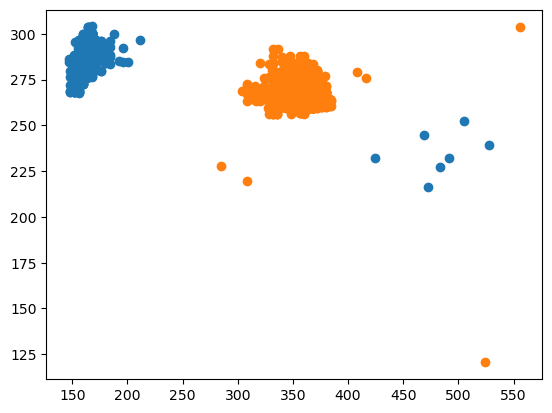

In [11]:
plt.scatter(coordinates_dict['left.x'], coordinates_dict['left.y'])
plt.scatter(coordinates_dict['right.x'], coordinates_dict['right.y'])
plt.show()

In [13]:
theta = lp.find_horizontal_axis_angle(df, 'left', 'center')
theta

LinAlgError: SVD did not converge in Linear Least Squares

In [15]:
center_point = lp.get_left_right_center_point(coordinates_dict)
center_point

(nan, nan)

In [17]:
columns_of_interest = ['left', 'right', 'center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
remformatted_coordinates_dict = lp.get_reformatted_coordinates_dict(coordinates_dict, columns_of_interest)
centered_coordinates_dict = lp.get_centered_coordinates_dict(remformatted_coordinates_dict, center_point)
rotated_coordinates_dict = lp.get_rotated_coordinates_dict(centered_coordinates_dict, theta)

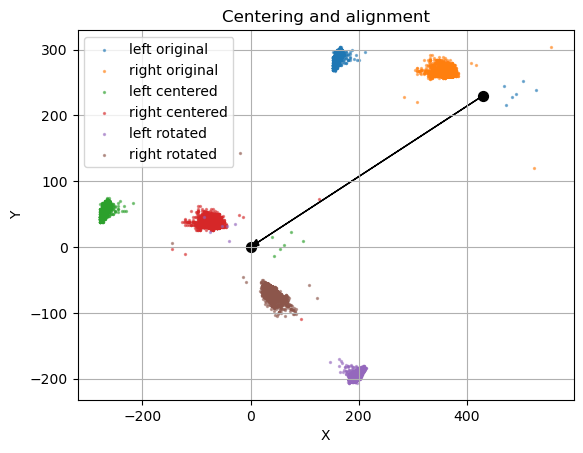

In [18]:
plt.title('Centering and alignment')

plt.scatter(remformatted_coordinates_dict['left'][:,0], remformatted_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(remformatted_coordinates_dict['right'][:,0], remformatted_coordinates_dict['right'][:,1], s=2, alpha=0.5)

plt.scatter(centered_coordinates_dict['left'][:,0], centered_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(centered_coordinates_dict['right'][:,0], centered_coordinates_dict['right'][:,1], s=2, alpha=0.5)


plt.scatter(rotated_coordinates_dict['left'][:,0], rotated_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(rotated_coordinates_dict['right'][:,0], rotated_coordinates_dict['right'][:,1], s=2, alpha=0.5)

plt.scatter(center_point[0], center_point[1], s=50, c='black')
plt.scatter(0, 0, s=50, c='black')
plt.arrow(center_point[0], center_point[1], -center_point[0], -center_point[1], length_includes_head=True, head_width=10, color='black')

plt.legend(['left original', 'right original', 'left centered', 'right centered', 'left rotated', 'right rotated'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

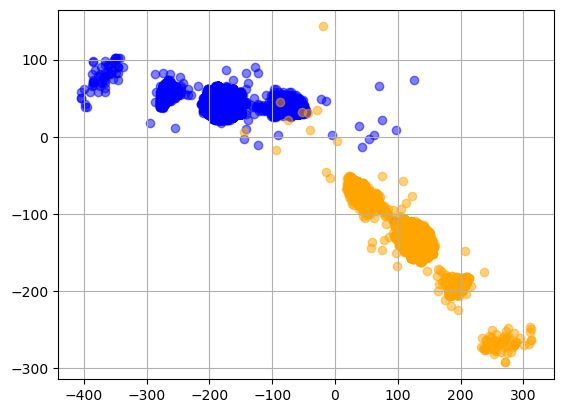

In [19]:
for point, arr in centered_coordinates_dict.items():
    plt.scatter(arr[:,0], arr[:,1], c='blue', alpha=0.5)

for point, arr in rotated_coordinates_dict.items():
    plt.scatter(arr[:,0], arr[:,1], c='orange', alpha=0.5)

plt.grid()
plt.show()

In [20]:
ellipse_parameters_data, ellipse_center_points_data = lp.get_fitted_ellipse_parameters(rotated_coordinates_dict, ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'])

LinAlgError: Array must not contain infs or NaNs

NameError: name 'ellipse_center_points_data' is not defined

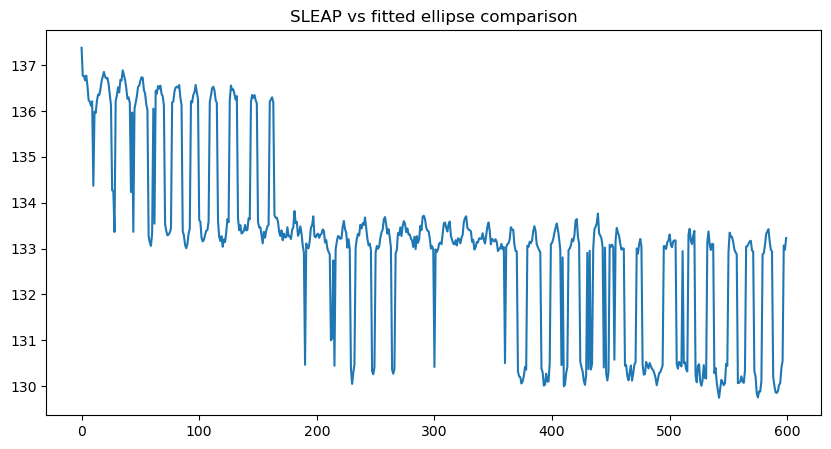

In [21]:
a = 0
b = 600
plt.figure(figsize=(10,5))
plt.title('SLEAP vs fitted ellipse comparison')
plt.plot(rotated_coordinates_dict['center'][a:b,0])
plt.plot(ellipse_center_points_data[a:b,0])
# plt.plot(moving_average_smoothing(ellipse_center_points_data[a:b,0], 10))
# plt.plot(median_filter(ellipse_center_points_data[a:b,0], size=10))
# plt.legend(['SLEAP center', 'Fitted ellipse center', '5 point moving average fitted ellipse', 'Size 5 median filter fitted ellipse'])
plt.legend(['SLEAP center', 'Fitted ellipse center'])
plt.xlabel('frame')
plt.ylabel('x')
plt.show()

NameError: name 'ellipse_center_points_data' is not defined

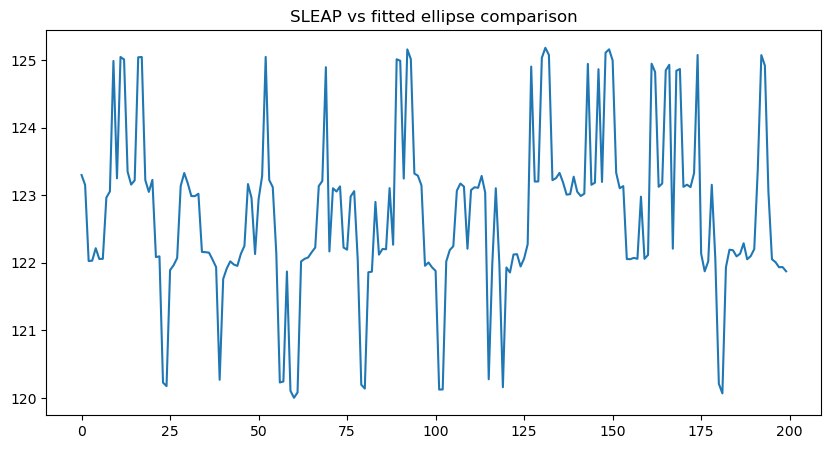

In [22]:
a = 3200
b = 3400
plt.figure(figsize=(10,5))
plt.title('SLEAP vs fitted ellipse comparison')
plt.plot(rotated_coordinates_dict['center'][a:b,0])
plt.plot(ellipse_center_points_data[a:b,0])
# plt.plot(moving_average_smoothing(ellipse_center_points_data[a:b,0], 10))
# plt.plot(median_filter(ellipse_center_points_data[a:b,0], size=10))
# plt.legend(['SLEAP center', 'Fitted ellipse center', '5 point moving average fitted ellipse', 'Size 5 median filter fitted ellipse'])
plt.legend(['SLEAP center', 'Fitted ellipse center'])
plt.xlabel('frame')
plt.ylabel('x')
plt.show()